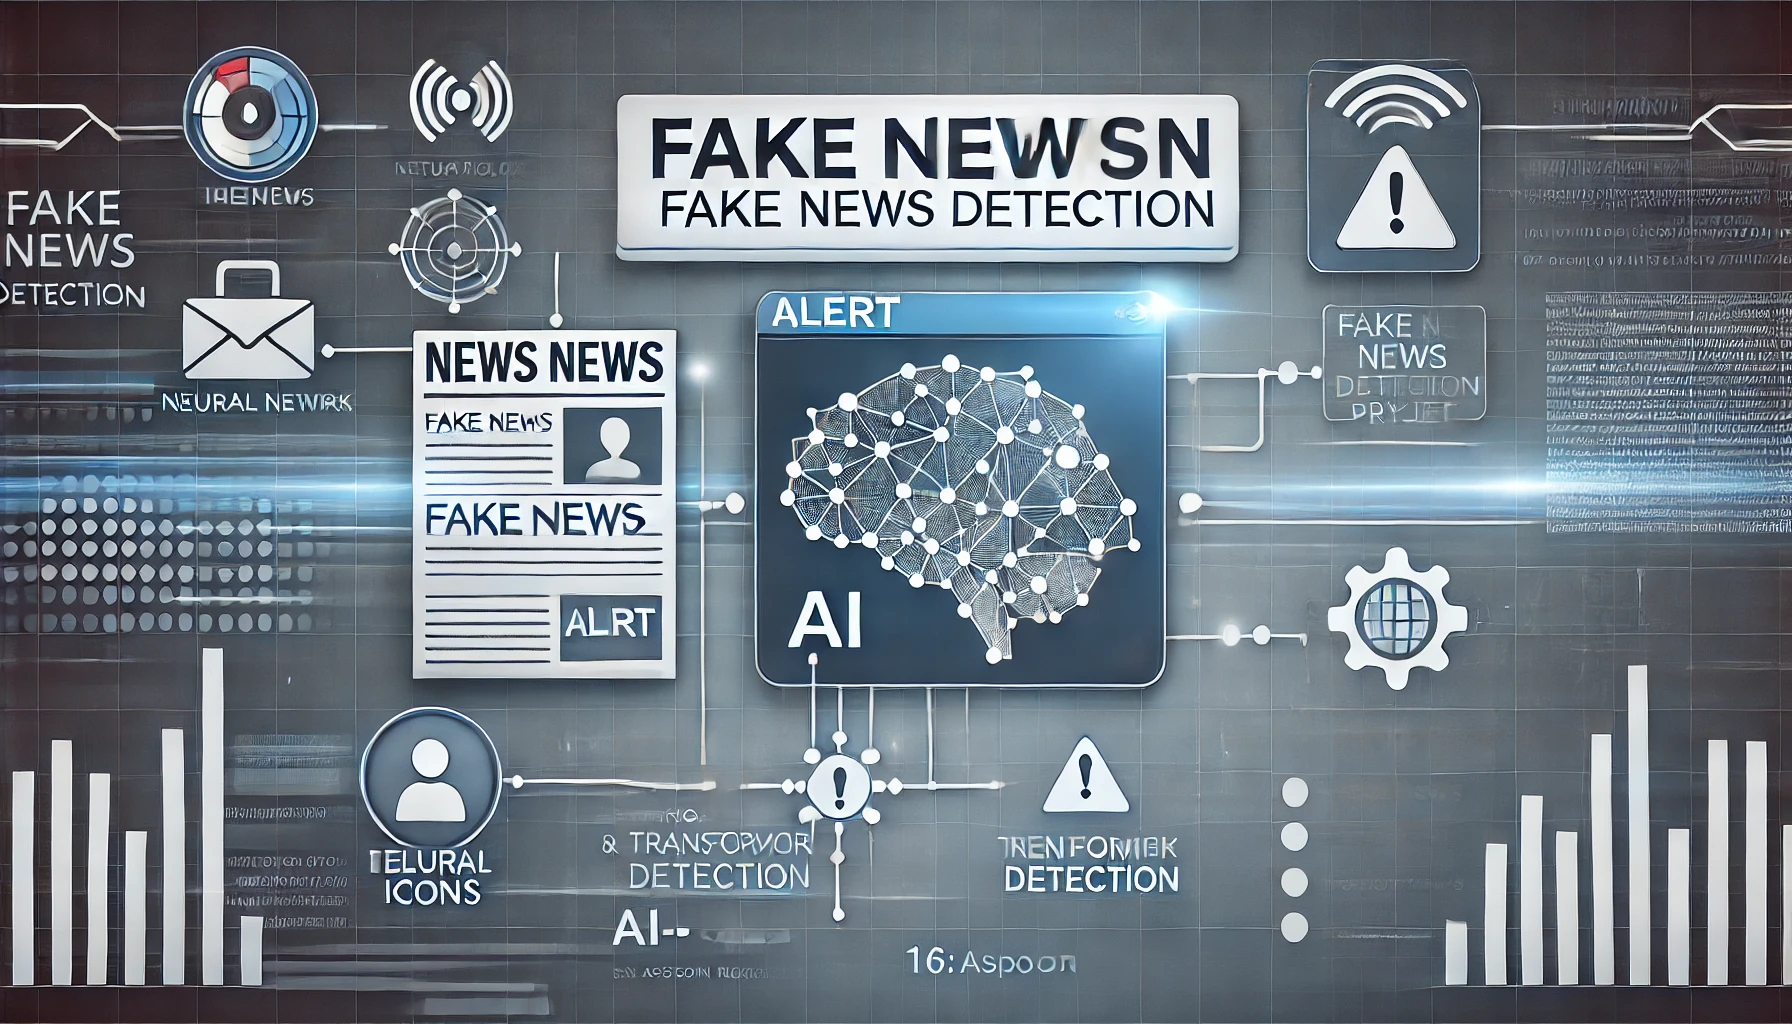

# **Problem Statement**

The proliferation of fake news on digital platforms poses a serious threat to public opinion, political stability, and overall trust in media sources. Traditional detection systems often rely on surface-level content analysis, lacking the depth to accurately identify fake news across different topics and writing styles. This project addresses these limitations by building a robust machine learning model using transformer-based architectures to analyze, classify, and detect fake news with high accuracy. By utilizing data augmentation and managing class imbalance, the system enhances model generalization, making it suitable for real-world applications where fake news can have significant societal impact.

# **Objectives**

1. **Develop a Transformer-Based Model for Fake News Classification**:
   - Use a pre-trained transformer model (e.g., DistilBERT) fine-tuned for binary classification to distinguish between real and fake news articles with high accuracy.
  
2. **Optimize Data Preprocessing with Advanced Cleaning Techniques**:
   - Implement comprehensive data cleaning, removing irrelevant information (e.g., URLs, special characters) and normalizing text data to improve input quality for the model.

3. **Apply Data Augmentation to Improve Model Generalization**:
   - Utilize data augmentation techniques like synonym replacement to generate diverse training samples, reducing the likelihood of model overfitting and improving performance on minority classes.

4. **Address Class Imbalance to Enhance Detection Reliability**:
   - Handle class imbalance by augmenting the minority class or using class-weighted loss, ensuring the model does not disproportionately favor the majority class and maintains balanced predictions.

5. **Implement a Scalable Pipeline for Real-Time Detection**:
   - Develop a streamlined, end-to-end pipeline that supports real-time or batch processing of articles, enabling timely identification of fake news in a scalable manner.

# **Business Impacts**

1. **Protects Brand Reputation and Trustworthiness**:
   - By integrating a reliable fake news detection system, media platforms and businesses can prevent the spread of misinformation that may damage their credibility and brand reputation.

2. **Enhances Decision-Making in Media and Advertising**:
   - Marketing and media firms can make more informed decisions about content sharing, avoiding endorsements or collaborations with potentially harmful or misleading sources.

3. **Strengthens Platform Moderation and Content Quality**:
   - For digital platforms, implementing fake news detection improves content quality by filtering out unreliable information, creating a safer and more informative space for users.

4. **Boosts Audience Engagement and Retention**:
   - Users are more likely to trust platforms that prioritize content accuracy, leading to higher engagement, user retention, and loyalty, which positively impacts revenue.

5. **Reduces Risk of Legal Liabilities**:
   - Fake news detection mitigates risks associated with the dissemination of harmful information, reducing potential legal repercussions for misinformation spread on media platforms.

# **Approach**


1. **Data Collection and Preprocessing**:
   - **Data Sources**: Collect a labeled dataset with real and fake news articles, such as the CREMA, Ravdess, Savee, or Tess datasets, or similar open-source data repositories.
   - **Cleaning Techniques**: Remove URLs, special characters, and stopwords; normalize text by converting to lowercase and performing lemmatization.
   - **Combining Features**: Concatenate relevant fields (e.g., article title and body) to provide the model with more contextual information, increasing classification accuracy.

2. **Data Augmentation and Handling Class Imbalance**:
   - **Data Augmentation**: Generate synthetic samples for the minority class by applying synonym replacement and other augmentation techniques to increase data diversity.
   - **Balancing Techniques**: Either upsample the minority class using augmented samples or apply class-weighted loss functions to ensure both classes are equally prioritized by the model.

3. **Model Selection and Fine-Tuning**:
   - **Model Architecture**: Use a transformer-based architecture (DistilBERT) with a binary classification head.
   - **Hyperparameter Tuning**: Perform hyperparameter tuning using techniques such as Optuna, adjusting parameters like learning rate, batch size, and dropout to maximize performance.

4. **Training and Evaluation**:
   - **Training Procedure**: Train the model on a balanced, augmented dataset over multiple epochs, validating performance on a held-out test set.
   - **Evaluation Metrics**: Assess the model using accuracy, F1 score, precision, and recall to ensure balanced and reliable classification of both real and fake news.

5. **Deployment and Real-Time Inference**:
   - **Inference Pipeline**: Build a scalable, production-ready pipeline capable of handling real-time or batch-mode predictions, potentially deploying on cloud infrastructure for accessibility.
   - **User Interaction and Feedback Loop**: Collect feedback on predictions to periodically retrain and refine the model, adapting to new data patterns over time.

# Load the libraries

In [1]:
!pip install optuna -q
!pip install nltk spacy -q
!python -m spacy download en_core_web_sm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import numpy as np
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from wordcloud import STOPWORDS
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import optuna
from optuna import Trial
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
url = f'https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg
From (redirected): https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg&confirm=t&uuid=5877b0b0-4af2-4a41-b993-d85622c6648f
To: /content/dataset.csv
100%|██████████| 115M/115M [00:02<00:00, 41.3MB/s]


# Looking into the dataset

In [4]:
df.shape

(44881, 5)

In [5]:
df.head()

,id,title,text,subject,label
0,0,Exclusive: Six U.S. senators urge Obama to pri...,NEW YORK - Six U.S. senators have urged Presid...,politicsNews,0
1,1,Saudi's Kingdom Holding says has support from ...,DUBAI - Saudi Arabian investment firm Kingdom ...,worldnews,0
2,2,WOW! STARBUCKS CEO JUST ACCUSED Whites Of Comm...,Thousands of Starbucks customers cut up their ...,politics,1
3,3,WORKING CLASS REVOLT! OLD SCHOOL JERSEY PATRIO...,HE WILL NOT DIVIDE US .,left-news,1
4,4,WATTERS’ WORLD: “Do you have Obamacare?”…”How ...,NaN,politics,1


## About the Dataset

1. id: unique id for a news article
2. title: the title of a news article
3. text: the text of the article; could be incomplete
4. subject: subject of news article
5. label: a label that marks whether the news article is real or fake
           0: Real News
           1: Fake News




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44881 entries, 0 to 44880
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       44881 non-null  int64 
 1   title    44881 non-null  object
 2   text     44250 non-null  object
 3   subject  44881 non-null  object
 4   label    44881 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum()

,0
id,0
title,0
text,631
subject,0
label,0


In [8]:
df.nunique()

,0
id,44881
title,38722
text,38631
subject,8
label,2


# Handling Missing Values

## Drop rows with missing 'text'

In [9]:
df.dropna(subset=['text'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44250 entries, 0 to 44880
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       44250 non-null  int64 
 1   title    44250 non-null  object
 2   text     44250 non-null  object
 3   subject  44250 non-null  object
 4   label    44250 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


## Removing duplicate rows

In [11]:
df.drop_duplicates(subset=['title', 'text'], inplace=True)

In [12]:
df.isnull().sum()

,0
id,0
title,0
text,0
subject,0
label,0


In [13]:
df.nunique()

,0
id,38649
title,38275
text,38631
subject,8
label,2


# Exploratory  Data Analysis

In [14]:
df['label'].value_counts()

,count
label,
0,21194
1,17455


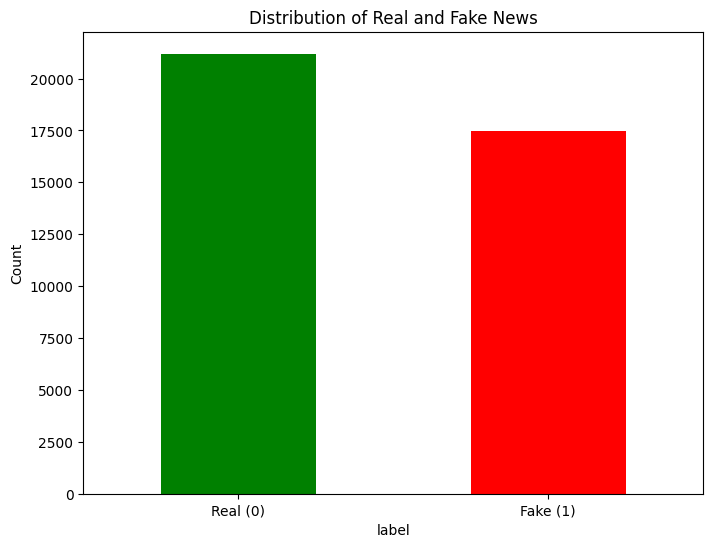

In [16]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Real and Fake News')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Real (0)', 'Fake (1)'], rotation=0)
plt.show()

This bar chart shows the **distribution of real and fake news articles** in the dataset. It has two bars:

- The **green bar** represents the count of real news articles, labeled as "Real (0)." Its height indicates that there are around **20,000+** real news articles in the dataset.
- The **red bar** represents the count of fake news articles, labeled as "Fake (1)." This bar is slightly shorter, indicating around **18,000+** fake news articles.

***Insights***
- There’s a slight imbalance, with more real news articles than fake ones.
- This imbalance might affect the model’s performance, so techniques like data augmentation, class weighting, or oversampling may be considered to handle it.

This distribution visualization helps in understanding class imbalance, which is crucial for creating a balanced and effective fake news detection model.

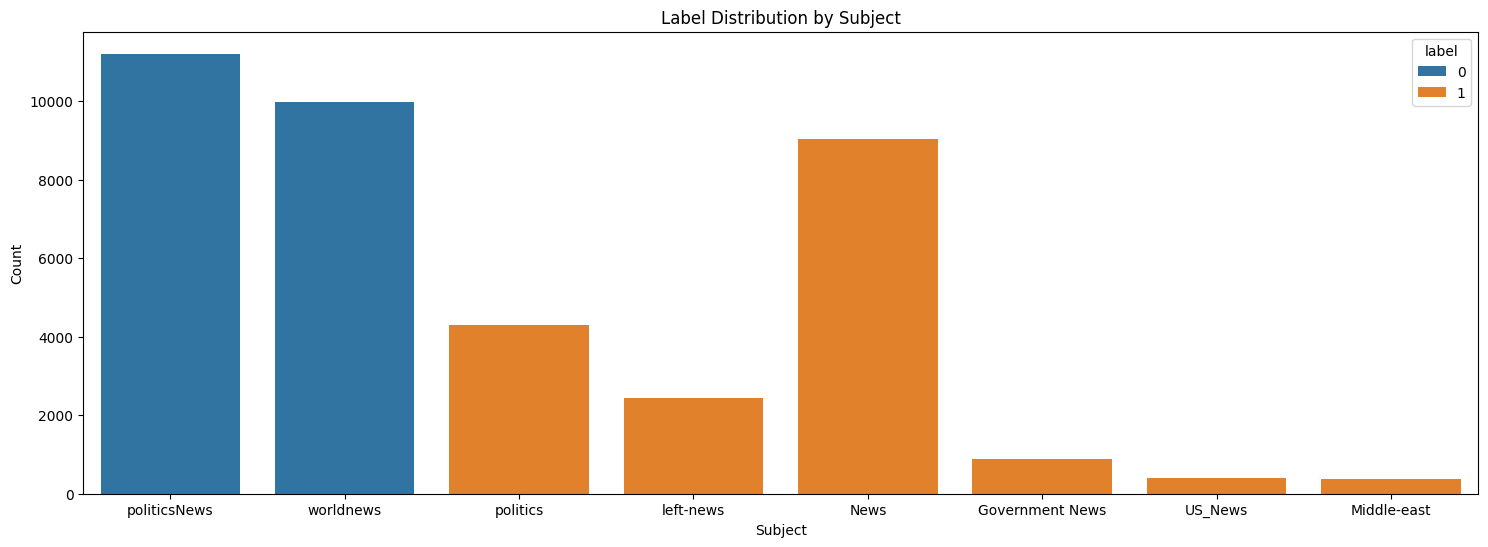

In [18]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='subject', hue='label')

plt.title('Label Distribution by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

This bar chart displays the **distribution of real (label 0) and fake (label 1) news across different subjects**. Here’s a breakdown:

- **Subjects**:
  - The x-axis lists various news subjects such as *politicsNews*, *worldnews*, *politics*, *left-news*, *News*, *Government News*, *US_News*, and *Middle-east*.
  
- **Label Distribution**:
  - **Blue Bars (label 0)** represent real news, while **orange bars (label 1)** represent fake news within each subject.
  - **politicsNews** and **worldnews** have the highest counts of real news.
  - **News** and **politics** have the highest counts of fake news.
  - Topics like *US_News* and *Middle-east* have fewer entries, primarily in the fake news category.

***Insights***
- The distribution indicates that certain topics (e.g., *politicsNews*, *worldnews*) have more real news, while others like *News* and *politics* contain more fake news.
- This imbalance may affect model training, as certain subjects are more associated with fake news, potentially influencing the model’s predictions.

# Feature Engineering

## Combine 'title', and 'text' for feature extraction

In [19]:
df['combined_text'] = df['title'] + ' ' + df['text']

In [20]:
df.head()

,id,title,text,subject,label,combined_text
0,0,Exclusive: Six U.S. senators urge Obama to pri...,NEW YORK - Six U.S. senators have urged Presid...,politicsNews,0,Exclusive: Six U.S. senators urge Obama to pri...
1,1,Saudi's Kingdom Holding says has support from ...,DUBAI - Saudi Arabian investment firm Kingdom ...,worldnews,0,Saudi's Kingdom Holding says has support from ...
2,2,WOW! STARBUCKS CEO JUST ACCUSED Whites Of Comm...,Thousands of Starbucks customers cut up their ...,politics,1,WOW! STARBUCKS CEO JUST ACCUSED Whites Of Comm...
3,3,WORKING CLASS REVOLT! OLD SCHOOL JERSEY PATRIO...,HE WILL NOT DIVIDE US .,left-news,1,WORKING CLASS REVOLT! OLD SCHOOL JERSEY PATRIO...
5,5,Britain close to deal on Brexit bill with EU -...,BRUSSELS/LONDON - Britain has offered to pay m...,worldnews,0,Britain close to deal on Brexit bill with EU -...


## Drop the all the columns except label	and combined_text

In [21]:
df.drop(columns=['id', 'title', 'text', 'subject'], inplace= True)

In [22]:
df.head()

,label,combined_text
0,0,Exclusive: Six U.S. senators urge Obama to pri...
1,0,Saudi's Kingdom Holding says has support from ...
2,1,WOW! STARBUCKS CEO JUST ACCUSED Whites Of Comm...
3,1,WORKING CLASS REVOLT! OLD SCHOOL JERSEY PATRIO...
5,0,Britain close to deal on Brexit bill with EU -...


# Separating the combined_text & label

In [23]:
X = df.drop(columns='label', axis=1)
y = df['label']

In [24]:
X.head(10)

,combined_text
0,Exclusive: Six U.S. senators urge Obama to pri...
1,Saudi's Kingdom Holding says has support from ...
2,WOW! STARBUCKS CEO JUST ACCUSED Whites Of Comm...
3,WORKING CLASS REVOLT! OLD SCHOOL JERSEY PATRIO...
5,Britain close to deal on Brexit bill with EU -...
6,Trump Gives Newt Gingrich’s Wife Job As Vatica...
7,INSANE VIDEO: IT’S GRADUATION TIME…AND THAT ME...
8,Soldiers take over Zimbabwe state broadcaster:...
9,Second group of refugees to leave Australian c...
10,Islamic State claims attack on Damascus police...


In [25]:
y.sample(10)

,label
27059,1
30331,0
6507,0
3423,0
17395,1
21807,0
3469,0
33613,1
14712,0
2392,0


# Creating Lemmas

In [26]:
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

X['combined_text'] = X['combined_text'].apply(clean_text).apply(lemmatize_text)

In [27]:
X.head()

,combined_text
0,exclusive six senator urge Obama prioritize cy...
1,Saudi Kingdom Holding say have support from go...
2,WOW starbuck CEO just accuse white commit Sens...
3,WORKING CLASS REVOLT OLD SCHOOL JERSEY PATRIOT...
5,Britain close deal Brexit bill with source BRU...


# Use Term Frequency - Inverse Document Frequency (TF-IDF) for scoring the text

In [28]:
tfidf = TfidfVectorizer(
    token_pattern=r"\b[a-zA-Z]{3,}\b",
    stop_words=list(STOPWORDS),
    min_df=5,
    max_df=0.8
)

In [29]:
tfidf_X = tfidf.fit_transform(X.values.ravel())

In [30]:
tfidf_X

<38649x28562 sparse matrix of type '<class 'numpy.float64'>'
	with 5744195 stored elements in Compressed Sparse Row format>

# Use SVD to transform the sparse TF-IDF matrix into a dense matrix

In [31]:
svd= TruncatedSVD(n_components= 300, algorithm= 'arpack')
svd_mat= svd.fit_transform(tfidf_X)

In [32]:
svd_mat.shape

(38649, 300)

In [33]:
svd_mat

array([[ 0.22463693, -0.10629166, -0.07254035, ...,  0.03667446,
        -0.0245094 , -0.01935089],
       [ 0.09114276, -0.0691577 , -0.0428828 , ..., -0.00920833,
        -0.01006393, -0.02139085],
       [ 0.11228695,  0.03576996,  0.0022411 , ..., -0.00717708,
        -0.0107567 , -0.0174844 ],
       ...,
       [ 0.15373505,  0.1019081 ,  0.08583401, ..., -0.00899764,
        -0.00211708, -0.00286725],
       [ 0.1538438 ,  0.03463254, -0.05866174, ...,  0.01532538,
         0.00881361,  0.00618358],
       [ 0.12845372, -0.01474578, -0.07233302, ..., -0.0023643 ,
         0.0205269 ,  0.03167084]])

# Map the SVD matrix with label and split the dataset into training and testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(svd_mat, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape

((30919, 300), (7730, 300))

# Training the model

## Logistic Regression model

In [36]:
def objective(trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e-6, 1e2),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }

    if params['solver'] == 'liblinear' and params['penalty'] == 'l1':
        params['solver'] = 'saga'

    model = LogisticRegression(**params, random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-10-29 07:46:53,365] A new study created in memory with name: no-name-4b06a066-f6b3-4b46-9bc6-590f5d62f94e
[I 2024-10-29 07:46:54,217] Trial 0 finished with value: 0.9608839580218765 and parameters: {'C': 5.203542313321099e-06, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9608839580218765.
[I 2024-10-29 07:46:56,758] Trial 1 finished with value: 0.5 and parameters: {'C': 0.0017707796846384266, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': None}. Best is trial 0 with value: 0.9608839580218765.
[I 2024-10-29 07:46:58,232] Trial 2 finished with value: 0.971959772317922 and parameters: {'C': 0.011002568344936181, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.971959772317922.
[I 2024-10-29 07:47:12,428] Trial 3 finished with value: 0.9944493018241047 and parameters: {'C': 0.5825961681520921, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': None}. Best is trial 3

In [37]:
print(f'Best parameters for Logistic Regression: {study.best_params}')

Best parameters for Logistic Regression: {'C': 28.8401064351474, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': None}


In [38]:
lr_model = LogisticRegression(**study.best_params, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(C=28.8401064351474, random_state=42, solver='liblinear')

In [39]:
y_pred_test = lr_model.predict(X_test)

### Model Evaluation

In [40]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f'Logistic Regression - Test Accuracy: {test_accuracy}')
print(f'Logistic Regression - Test Precision: {test_precision}')
print(f'Logistic Regression - Test Recall: {test_recall}')
print(f'Logistic Regression - Test F1-score: {test_f1}')

Logistic Regression - Test Accuracy: 0.9746442432082795
Logistic Regression - Test Precision: 0.976155431262879
Logistic Regression - Test Recall: 0.9664820751967357
Logistic Regression - Test F1-score: 0.971294669009959


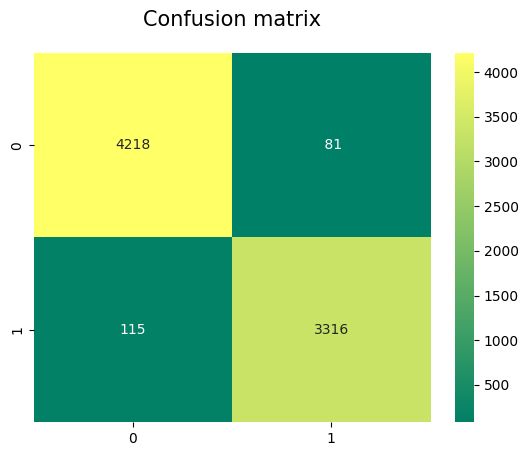

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()

This **confusion matrix** visualizes the performance of the fake news detection model, showing how well it classified real (label 0) and fake (label 1) news articles:

- **True Positives (Bottom Right, 3316)**: The model correctly identified 3316 fake news articles as fake (label 1).
- **True Negatives (Top Left, 4218)**: The model correctly identified 4218 real news articles as real (label 0).
- **False Positives (Top Right, 81)**: The model incorrectly classified 81 real news articles as fake.
- **False Negatives (Bottom Left, 115)**: The model incorrectly classified 115 fake news articles as real.

***Insights***
- The model performs well, with most predictions being correct, indicated by high true positive and true negative values.
- The low numbers of false positives and false negatives suggest high accuracy and reliability in distinguishing between real and fake news.
  
This confusion matrix highlights the model's effectiveness in fake news detection, with minimal errors in classification.

### Top 20 features

In [45]:
terms = tfidf.get_feature_names_out()
important_features = sorted(zip(tfidf_X.sum(axis=0).A1, terms), reverse=True)

for score, term in important_features[:20]:
    print(f"{term}: {score:.4f}")

trump: 2346.1052
president: 870.0430
will: 750.8227
state: 718.4139
clinton: 684.7325
house: 664.4739
obama: 654.7082
people: 642.1074
year: 589.1555
republican: 585.7945
make: 566.4170
white: 551.4635
donald: 547.9196
one: 543.6012
new: 541.1424
election: 539.7971
government: 538.9564
party: 522.8050
vote: 513.7044
campaign: 500.3952


The **top 20 most important terms** in the dataset based on their **TF-IDF (Term Frequency-Inverse Document Frequency) scores**. TF-IDF helps measure the importance of terms within the context of the dataset, balancing both term frequency and rarity.

***Explanation of Key Components***

1. **TF-IDF Terms and Scores**:
   - `terms = tfidf.get_feature_names_out()`: This retrieves the list of terms (or words) used by the TF-IDF vectorizer.
   - `tfidf_X.sum(axis=0).A1`: This calculates the sum of TF-IDF scores across all documents for each term, providing a measure of each term's overall importance.
   
2. **Sorting and Output**:
   - `important_features = sorted(...)`: The code sorts the terms based on their total TF-IDF scores in descending order.
   - `for score, term in important_features[:20]`: This loop prints the top 20 terms along with their scores, highlighting the most significant terms across the dataset.

***Output Interpretation***

Each term in the output list is associated with a high TF-IDF score, indicating it’s frequently used and significant in the context of this dataset. For example:
- **"trump" (2346.1052)**, **"president" (870.0430)**, **"will" (750.8227)**: These words have high scores, meaning they are both common and important in the dataset.
- Other terms like **"clinton"**, **"house"**, and **"obama"** likely reflect frequent topics, possibly political, as they are often discussed together in news contexts.

***Insights***

These top terms provide a snapshot of key themes in the dataset, likely political or government-related topics, which are relevant for detecting fake news related to these subjects.

## Random Forest Classifier model

In [46]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 200, 20),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }

    model = RandomForestClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-10-29 07:54:31,532] A new study created in memory with name: no-name-d1cdb11d-10fc-45b0-9862-4ada311da367
[I 2024-10-29 07:54:52,176] Trial 0 finished with value: 0.9700323113000593 and parameters: {'n_estimators': 20, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.9700323113000593.
[I 2024-10-29 07:56:37,268] Trial 1 finished with value: 0.9766268936579628 and parameters: {'n_estimators': 80, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.9766268936579628.
[I 2024-10-29 07:58:00,126] Trial 2 finished with value: 0.977189046652208 and parameters: {'n_estimators': 60, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.977189046652208.
[I 2024-10-29 08:02:09,084] Trial 3 finished with value: 0.978244568212142 and parameters: {'n_estimators': 200, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 3 with value: 0

In [47]:
print(f'Best parameters for Random Forest: {study.best_params}')

Best parameters for Random Forest: {'n_estimators': 160, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 3}


In [48]:
rf_model = RandomForestClassifier(**study.best_params, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=13,
                       n_estimators=160, random_state=42)

In [49]:
y_pred_test = rf_model.predict(X_test)

### Model Evaluation

In [50]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f'Random Forest - Test Accuracy: {test_accuracy}')
print(f'Random Forest - Test Precision: {test_precision}')
print(f'Random Forest - Test Recall: {test_recall}')
print(f'Random Forest - Test F1-score: {test_f1}')

Random Forest - Test Accuracy: 0.9257438551099612
Random Forest - Test Precision: 0.9459881361223853
Random Forest - Test Recall: 0.8831244535120956
Random Forest - Test F1-score: 0.9134760325595418


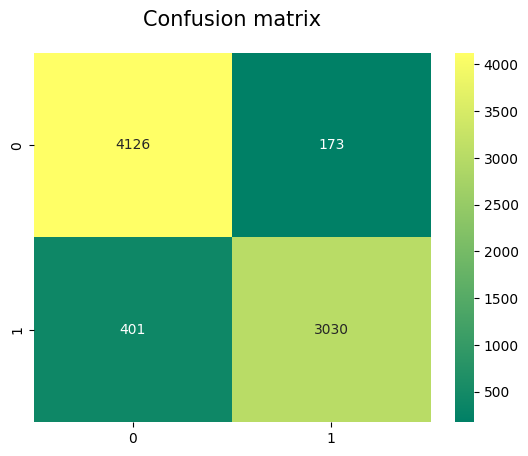

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()

This **confusion matrix** shows the performance of a fake news detection model, detailing the counts of correct and incorrect predictions for real (label 0) and fake (label 1) news:

- **True Positives (Bottom Right, 3030)**: The model correctly identified 3030 fake news articles as fake (label 1).
- **True Negatives (Top Left, 4126)**: The model correctly classified 4126 real news articles as real (label 0).
- **False Positives (Top Right, 173)**: The model incorrectly classified 173 real news articles as fake.
- **False Negatives (Bottom Left, 401)**: The model incorrectly classified 401 fake news articles as real.

***Insights***
- The model has a good number of true positives and true negatives, indicating it performs well on both classes.
- However, there are more false negatives (401) than false positives (173), meaning the model tends to miss some fake news articles, potentially leading to lower recall.
  
This confusion matrix suggests a strong overall performance but indicates room for improvement in correctly identifying fake news.

## XGBoost Classifier model

In [53]:
def objective(trial):
  params= {
      'learning_rate': trial.suggest_float('learning_rate',0.001,0.2),
      'max_depth': trial.suggest_int('max_depth',1,8),
      'min_child_weight': trial.suggest_float('min_child_weight',0.5,10),
      'reg_lamda': trial.suggest_float('reg_lamda',0.001,20),
      'n_estimators': trial.suggest_int('n_estimators',20,200),
      'max_leaves': trial.suggest_int('max_leaves',2,20),
      'verbosity':0,
      'objective':'binary:logistic',
      'eval_metric':'logloss',

  }

  model = XGBClassifier(**params, random_state=42)
  score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()
  return score

study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-10-29 09:12:37,356] A new study created in memory with name: no-name-7c5feb87-5808-4383-9df9-ad4c716eba50
[I 2024-10-29 09:13:05,947] Trial 0 finished with value: 0.9910333441377571 and parameters: {'learning_rate': 0.16957861487919643, 'max_depth': 7, 'min_child_weight': 2.5133983226197314, 'reg_lamda': 4.507930978477588, 'n_estimators': 142, 'max_leaves': 16}. Best is trial 0 with value: 0.9910333441377571.
[I 2024-10-29 09:13:15,022] Trial 1 finished with value: 0.9537774774587252 and parameters: {'learning_rate': 0.10831272061429818, 'max_depth': 2, 'min_child_weight': 6.0133128241717815, 'reg_lamda': 3.8331308450509414, 'n_estimators': 102, 'max_leaves': 2}. Best is trial 0 with value: 0.9910333441377571.
[I 2024-10-29 09:13:52,093] Trial 2 finished with value: 0.967585819173142 and parameters: {'learning_rate': 0.025603149624360323, 'max_depth': 3, 'min_child_weight': 9.511217017732823, 'reg_lamda': 8.654083057778799, 'n_estimators': 186, 'max_leaves': 9}. Best is trial 0

In [54]:
print(f'Best parameters for XGBoost: {study.best_params}')

Best parameters for XGBoost: {'learning_rate': 0.18351114780830244, 'max_depth': 6, 'min_child_weight': 6.14103180600642, 'reg_lamda': 12.098273377751562, 'n_estimators': 200, 'max_leaves': 18}


In [55]:
xgb_model = XGBClassifier(**study.best_params, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.18351114780830244,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=18,
              min_child_weight=6.14103180600642, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [56]:
y_pred_test = xgb_model.predict(X_test)

### Model Evaluation

In [58]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f'XGBoost - Test Accuracy: {test_accuracy}')
print(f'XGBoost - Test Precision: {test_precision}')
print(f'XGBoost - Test Recall: {test_recall}')
print(f'XGBoost - Test F1-score: {test_f1}')

XGBoost - Test Accuracy: 0.9648124191461837
XGBoost - Test Precision: 0.968
XGBoost - Test Recall: 0.9522005246283882
XGBoost - Test F1-score: 0.9600352630032325


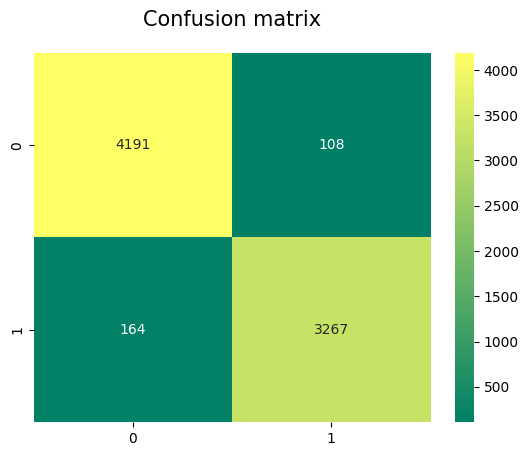

In [61]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()

This **confusion matrix** shows the performance of a fake news detection model, likely an improved model or an XGBoost classifier, as it has reduced errors compared to previous matrices:

- **True Positives (Bottom Right, 3267)**: The model correctly classified 3267 fake news articles as fake (label 1).
- **True Negatives (Top Left, 4191)**: The model correctly identified 4191 real news articles as real (label 0).
- **False Positives (Top Right, 108)**: The model incorrectly classified 108 real news articles as fake.
- **False Negatives (Bottom Left, 164)**: The model incorrectly classified 164 fake news articles as real.

***Insights***
- The model has strong performance with high true positive and true negative counts.
- The number of false positives (108) and false negatives (164) is relatively low, indicating both high precision and recall.
- This confusion matrix suggests a well-balanced model that is accurate at distinguishing between real and fake news, showing improvement over previous results with fewer misclassifications.

This performance implies that the model is reliable and may be suitable for deployment in real-world fake news detection applications.

## LighGBM Classifier model

In [62]:
import lightgbm as lgb

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'max_depth': trial.suggest_int('max_depth', 1, 8),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.5, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 20),
        'n_estimators': trial.suggest_int('n_estimators', 20, 200),
        'num_leaves': trial.suggest_int('num_leaves', 2, 20),
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1
    }

    model = lgb.LGBMClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-10-29 09:51:54,579] A new study created in memory with name: no-name-e5d5edbd-3b9b-4d66-8bea-52a03ec02f40
[I 2024-10-29 09:52:12,268] Trial 0 finished with value: 0.9742139423842002 and parameters: {'learning_rate': 0.08345371550274797, 'max_depth': 4, 'min_child_weight': 9.598554523773215, 'reg_lambda': 1.2670883811706481, 'n_estimators': 183, 'num_leaves': 3}. Best is trial 0 with value: 0.9742139423842002.
[I 2024-10-29 09:52:28,998] Trial 1 finished with value: 0.9631929471821526 and parameters: {'learning_rate': 0.02917628925314565, 'max_depth': 3, 'min_child_weight': 5.879537563881808, 'reg_lambda': 15.525714264175685, 'n_estimators': 140, 'num_leaves': 19}. Best is trial 0 with value: 0.9742139423842002.
[I 2024-10-29 09:52:58,999] Trial 2 finished with value: 0.9908932021547256 and parameters: {'learning_rate': 0.13655121328682562, 'max_depth': 7, 'min_child_weight': 3.4775960449675405, 'reg_lambda': 11.030251856417971, 'n_estimators': 159, 'num_leaves': 13}. Best is tr

In [63]:
print(f'Best parameters for LightGBM : {study.best_params}')

Best parameters for LightGBM : {'learning_rate': 0.18286462825185534, 'max_depth': 7, 'min_child_weight': 9.72328655965896, 'reg_lambda': 0.4752297047619338, 'n_estimators': 175, 'num_leaves': 17}


In [64]:
lgb_model = lgb.LGBMClassifier(**study.best_params, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.18286462825185534, max_depth=7,
               min_child_weight=9.72328655965896, n_estimators=175,
               num_leaves=17, random_state=42, reg_lambda=0.4752297047619338)

In [65]:
y_pred_test = lgb_model.predict(X_test)

### Model Evaluation

In [66]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f'LightGBM - Test Accuracy: {test_accuracy}')
print(f'LightGBM - Test Precision: {test_precision}')
print(f'LightGBM - Test Recall: {test_recall}')
print(f'LightGBM - Test F1-score: {test_f1}')

LightGBM - Test Accuracy: 0.9645536869340233
LightGBM - Test Precision: 0.9693725840023788
LightGBM - Test Recall: 0.9501603031186243
LightGBM - Test F1-score: 0.9596702973211657


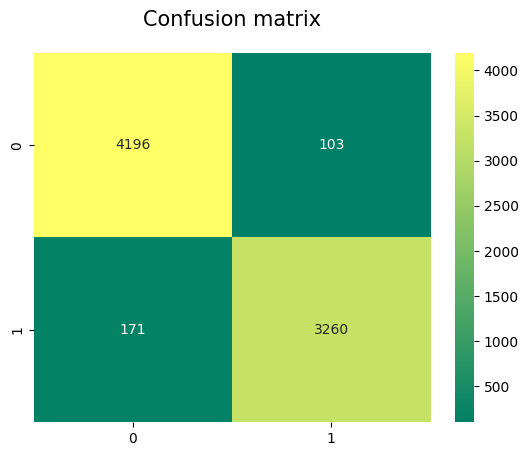

In [68]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion matrix', y=1.05, size=15)
plt.show()

This **confusion matrix** displays the performance of a fake news detection model, likely using the LightGBM classifier:

- **True Positives (Bottom Right, 3260)**: The model correctly classified 3260 fake news articles as fake (label 1).
- **True Negatives (Top Left, 4196)**: The model correctly identified 4196 real news articles as real (label 0).
- **False Positives (Top Right, 103)**: The model incorrectly classified 103 real news articles as fake.
- **False Negatives (Bottom Left, 171)**: The model incorrectly classified 171 fake news articles as real.

***Insights***
- The model shows strong performance with high numbers of true positives and true negatives, indicating it effectively distinguishes between real and fake news.
- The low count of false positives (103) and false negatives (171) demonstrates high accuracy, precision, and recall.
- Compared to previous confusion matrices, this model has minimal misclassifications, suggesting it is well-optimized for fake news detection.

Overall, the model appears to be both reliable and effective for real-world applications in identifying fake news.

# Create pipeline

In [69]:
class PreprocessingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")

    def clean_text(self, text):
        text = re.sub(r'\b\w{1,2}\b', '', text)
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def lemmatize_text(self, text):
        doc = self.nlp(text)
        return ' '.join([token.lemma_ for token in doc])

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['combined_text'] = X['combined_text'].apply(self.clean_text).apply(self.lemmatize_text)
        return X

## Preprocessing Pipeline

In [70]:
preprocessing_pipeline = Pipeline([
    ('preprocessing', PreprocessingTransformer())
])

## Feature Extraction Pipeline and Dimensionality Reduction Pipeline

In [71]:
feature_extraction_pipeline = ColumnTransformer([
    ('tfidf', TfidfVectorizer(
        token_pattern=r"\b[a-zA-Z]{3,}\b",
        stop_words=list(STOPWORDS),
        min_df=5,
        max_df=0.8),
     'combined_text')
])

dimensionality_reduction_pipeline = Pipeline([
    ('svd', TruncatedSVD(n_components=300, algorithm='arpack'))
])

## Transformation Pipeline

In [72]:
transformation_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('features', feature_extraction_pipeline),
    ('dim_reduction', dimensionality_reduction_pipeline)
])

In [ ]:
url = f'https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)
df.dropna(subset=['text'], inplace=True)
df.drop_duplicates(subset=['title', 'text'], inplace=True)
df['combined_text'] = df['title'] + ' ' + df['text']
df.drop(columns=['id', 'title', 'text', 'subject'], inplace=True)
X = df.drop(columns='label')
y = df['label']

X_transformed = transformation_pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

Downloading...
From (original): https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg
From (redirected): https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg&confirm=t&uuid=d790a8a3-84dc-49b7-8c1b-d54b2a4dd206
To: /content/dataset.csv
100%|██████████| 115M/115M [00:02<00:00, 41.1MB/s]


## Define Model

In [ ]:
model = LogisticRegression(
    C=4.573408970457499,
    penalty='l1',
    solver='saga',
    class_weight=None,
    random_state=42
)

model.fit(X_train, y_train)

LogisticRegression(C=4.573408970457499, penalty='l1', random_state=42,
                   solver='saga')

## Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'The Accuracy of the model is: {accuracy}')
print(f'The Precision of the model is: {precision}')
print(f'The Recall of the model is: {recall}')
print(f'The F1 score of the model is: {f1}')

The Accuracy of the model is: 0.9745148771021992
The Precision of the model is: 0.9758681577398469
The Recall of the model is: 0.9664820751967357
The F1 score of the model is: 0.971152438131498


In [ ]:
from google.colab import drive
import joblib

drive.mount('/content/drive')
joblib.dump(transformation_pipeline, '/content/drive/My Drive/transformation_pipeline.joblib')
joblib.dump(model, '/content/drive/My Drive/fake_news_model.joblib')

Mounted at /content/drive


['/content/drive/My Drive/fake_news_model.joblib']

# Validate on the new data

In [ ]:
def predict_new_input(model, transformation_pipeline):
    id = input("Enter the id: ")
    title = input("Enter the title: ")
    subject = input("Enter the subject: ")
    text = input("Enter the text: ")

    new_data = pd.DataFrame({'id': [id], 'title': [title], 'subject': [subject], 'text': [text]})

    new_data['combined_text'] = new_data['title'] + ' ' + new_data['text']
    new_data.drop(columns=['id', 'title', 'text', 'subject'], inplace=True)

    new_data_transformed = transformation_pipeline.transform(new_data)
    prediction = model.predict(new_data_transformed)

    return prediction[0]

new_prediction = predict_new_input(model, transformation_pipeline)

if new_prediction == 1:
    print('----------------------------------------------')
    print('The predicted label for the new input is: Fake')
else:
    print('----------------------------------------------')
    print('The predicted label for the new input is: Real')

Enter the id: 37924
Enter the title: Russia's Putin, on track for easy re-election, laments dearth of rivals
Enter the subject: worldnews
Enter the text: MOSCOW - Russian President Vladimir Putin said on Thursday he faced no credible high-profile political opponents as he prepared to run for re-election in March, but would work to try to create a more balanced political system. Putin, whom critics have accused of using state TV, the courts and the police to demonize and marginalize the liberal opposition, said earlier this month he would run for re-election in March 2018 - a contest he seems sure to win comfortably and extend his grip on power into a third decade. But in a sign the former KGB officer is keen to strengthen his role as a father of the nation figure rather than as a party political figure, Putin said he planned to run as an independent candidate and garner support from more than one party. The ruling United Russia party has traditionally backed Putin and is likely to do s

# Fake News Identification Using Pre-trained DistilBERT Model

In [ ]:
!pip install transformers -q
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import gdown
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

url = f'https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg'
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv('dataset.csv')

Downloading...
From (original): https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg
From (redirected): https://drive.google.com/uc?id=10NHrgshUfiBr__QxQb6s_Ok-twb5NBXg&confirm=t&uuid=dbe62a11-d477-49df-a2c2-ef621ac8ce58
To: /content/dataset.csv
100%|██████████| 115M/115M [00:03<00:00, 31.5MB/s]


In [ ]:
df.dropna(subset=['text'], inplace=True)
df.drop_duplicates(subset=['title', 'text'], inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
title,0
text,0
subject,0
label,0


In [ ]:
df.nunique()

,0
id,38649
title,38275
text,38631
subject,8
label,2


In [ ]:
df['combined_text'] = df['title'] + ' ' + df['text']

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_texts = train_df['combined_text'].tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['combined_text'].tolist()
test_labels = test_df['label'].tolist()

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

In [ ]:
# Create dataset class
class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Prepare datasets for fine-tuning
train_dataset = FakeNewsDataset(train_encodings, train_labels)
test_dataset = FakeNewsDataset(test_encodings, test_labels)

# Define accuracy metric for evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",     # evaluate every epoch
    save_strategy="epoch",           # save model every epoch
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics      # evaluation metrics
)

In [ ]:
trainer.train()

results = trainer.evaluate()
print(results)

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.012100,0.002359,0.999353,0.999272,0.998835,0.999709
2,0.000100,0.001218,0.999741,0.999708,1.000000,0.999417
3,0.000000,0.000509,0.999871,0.999854,1.000000,0.999709


{'eval_loss': 0.0005093116196803749, 'eval_accuracy': 0.9998706338939198, 'eval_f1': 0.9998542486518, 'eval_precision': 1.0, 'eval_recall': 0.9997085397843194, 'eval_runtime': 145.0226, 'eval_samples_per_second': 53.302, 'eval_steps_per_second': 0.834, 'epoch': 3.0}


## Validate on the new data

In [ ]:
title = input("Enter the title: ")
text = input("Enter the text: ")

combined_text = title + ' ' + text
texts = [combined_text]

inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
inputs = {k: v.to(device) for k, v in inputs.items()}

Enter the title: Russia calls U.S. threat to destroy North Korea a 'bloodthirsty tirade'
Enter the text: ROME - Russian Foreign Minister Sergei Lavrov said on Friday that a U.S. threat to destroy North Korea in the event of a war was a bloodthirsty tirade and military action against Pyongyang would be a big mistake. Speaking on a visit to Italy, Lavrov strongly condemned comments made by U.S. Ambassador to the United Nations Nikki Haley, who earlier this week warned North Korea s leadership it would be utterly destroyed if war were to break out after Pyongyang test fired its most advanced missile. If someone really wants to use force to, as the U.S. representative to the United Nations put it, destroy North Korea ...then I think that is playing with fire and a big mistake, Lavrov told reporters. He called Haley s speech on North Korea, which she made at an emergency U.N. Security Council meeting, a really bloodthirsty tirade . We will do everything to ensure that (the use of force) doe

In [ ]:
model = model.to(device)

with torch.no_grad():
    outputs = model(**inputs)

probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
predicted_class = torch.argmax(probs, dim=1).item()

In [ ]:
if predicted_class == 1:
    print('The predicted label for the new input is: Fake')
else:
    print('The predicted label for the new input is: Real')

The predicted label for the new input is: Real


In [ ]:
# Save the model
model.save_pretrained('./saved_model')

# **Conclusion**

This project successfully demonstrates a scalable and accurate approach to fake news detection, leveraging transformer-based architectures for contextually rich text classification. The use of data augmentation and class balancing improves model robustness, ensuring that the classifier generalizes well across varied fake news patterns and topics. The final solution is versatile, with applications in media, corporate, and public sectors, where reliable information dissemination is crucial. By providing users and platforms with accurate fake news detection, this system helps build a trustworthy digital environment, benefiting users, businesses, and the wider public.

# **Future Scope of Improvement**


1. **Integrate Multilingual Capabilities**:
   - Extend the model to detect fake news across multiple languages, allowing it to serve a broader user base. This can be achieved by incorporating multilingual transformers like mBERT or XLM-RoBERTa.

2. **Enhanced Explainability with Interpretability Tools**:
   - Add tools like LIME (Local Interpretable Model-Agnostic Explanations) or SHAP (SHapley Additive exPlanations) to provide insights into the model’s predictions, helping users understand why a particular article is classified as fake or real.

3. **Add Image and Video Analysis for Multimodal Detection**:
   - Develop a multimodal model that combines text, image, and video inputs for a more comprehensive fake news detection system. For instance, pairing image analysis with text classification can improve accuracy when dealing with multimedia-based misinformation.

4. **User Feedback for Continuous Learning and Model Adaptation**:
   - Implement a feedback loop where users can rate predictions, allowing the system to learn from actual user data and adapt over time to changing patterns in fake news.

5. **Integration with Fact-Checking Databases**:
   - Connect the model to external fact-checking APIs (like FactCheck or Snopes) to improve accuracy and provide additional context, further strengthening the system’s credibility.

6. **Real-Time Adaptation to Evolving Fake News Trends**:
   - Enable real-time retraining capabilities so that the model can adapt to new fake news trends, particularly during major events like elections or crises, ensuring its responses remain relevant.